# EDA(Exploratory Data Analysis)와 Data 전처리, 모델 분석 실습

## 학습목표
- 타이타닉 승객 데이터 분석을 통해 데이터 분석 과정을 복습한다.
- 데이터 전처리 과정에 초점을 맞추고 머신러닝 기반의 타이타닉 생존자 예측 모델 개발을 수행한다.

# Kaggle (캐글)

- 호주의 멜버른 기반 스타트업 기업
- Data Scientist들이 머신러닝을 이용해 주어진 과제에 대한 답을 찾아 제출하는 일종의 경연 사이트(http://www.kaggle.com/)
- 캐글을 이용하는 Data Scientist는 대략 60만 명(2017년 3월 기준) → 등록 이용자 500만 명(21년 7월)
- 2017년 3월 구글이 캐글을 인수(https://www.oss.kr/news/show/73482470-f684-4624-80fa-141f96b9a0d6)

- 캐글은 빅데이터 분석 플랫폼 업체; 문제해결, 학습, 전문가 조언 등...

## [캐글 사이트 이용 방법]

- 기업이나 기관들이 해결하고자 하는 문제를 온라인으로 캐글 사이트에 등록(일종의 크라우드 소싱)
- 데이터, 목표, 마감 시한, 보상 조건 등의 관련 정보 명시
- Data Scientist들이 일정 기간 이 문제를 경쟁적으로 풀게 됨
- 경합을 통해 경쟁순위가 정해지며 우승자에게는 보상과 명예가 주어짐
- e.g. 헤리티지 건강 재단에서는 "다음 해에 병원에 가야 할 환자"에 대한 예측 문제를 캐글에 올렸고, 9백여 개의 Data Scientist 팀들이 경합을 벌임, 약 1년 동안 경합이 진행되었으며 총상금은 3백만 달러였음

## 1. 데이터 준비

- 데이터 로딩 불러오기

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv()

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

- index 정리하기

## 2. 데이터 전처리

- 성별 인코딩

- 호칭 컬럼 만들기

In [3]:
                                                    #위 함수 적용; apply()


In [2]:
sns.countplot(data = train, x="Title", hue="Survived")

- Embarked - One-Hot-Encoding; 해당값만 1을 주고 나머지는 0(dummy_var)으로 처리

In [3]:
train.head(10)

In [25]:
train_embarked = pd.get_dummies(train["Embarked"], prefix = "Embarked")
train_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [26]:
test_embarked = pd.get_dummies(test["Embarked"], prefix = "Embarked")
test_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


- 데이터 합치기
- train + train_embarked, test + test_embarked

In [27]:
      # column을 기준으로 합침, axis=1

In [28]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1


In [29]:
test = pd.concat([test, test_embarked], axis=1) 
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0,0,1


# EDA: 탐색적 분석

In [30]:
import seaborn as sns

- Countplot

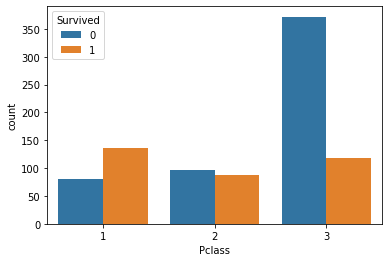

In [33]:
sns.countplot(data=train, x="Pclass", hue="Survived")

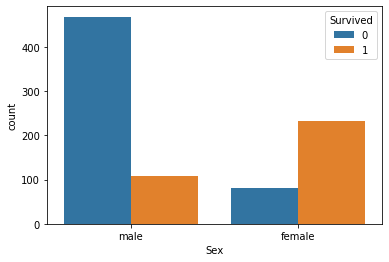

In [34]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [4]:
# countplot, x="SibSp"

In [5]:
# countplot, x="Parch" 

In [ ]:
# correlation

In [ ]:
# pairplot

## Train/Test 데이터 셋 만들기

- Decision Tree(머신러닝)

> - 학습

> - 예측

## Submission

- 모델의 성능을 높이기 위해 변수를 추가하거나 알고리즘을 변경하는 등의 방법 사용 가능
- 'Title' 등을 추가하거나 RandomForestClassifier(n_estimators = , max_depth = ) 등 이용